<p style="font-family:Times;font-size:250%; text-align:center"> <font color='black'>Tugas 1 MA4072 Pembelajaran Mendalam</font></p>
<p style="font-family:Times;font-size:100%; text-align:center"> <font color='black'>JOHANNES FELIX RIMBUN 13217006</font></p>

___



#### Pemodelan Harga Saham General Motors
>* Data diambil dari Yahoo Finance dan disimpan pada file GM.csv

In [1]:
from numpy import *   
import numpy as np
from numpy.random import *
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

np.set_printoptions(precision = 3, suppress = True, formatter = {'float':'{:5.4f}'.format})

#Sigmoid function & its derivative
sigmoid = lambda Z: 1/(1+exp(-Z))
dsigmoid = lambda A: A*(1-A)

#ReLU function & its derivative
ReLU  = lambda Z: Z.clip(0)
#Derivative of ReLU function
dReLU = lambda A: (A > 0)*1

#Derivativer of tanh()
dtanh = lambda A: 1-A**2

#Derivative oh arctanh
darctanh = lambda A: 1/(A**2+1)

#Softplus function & its derivative
splus = lambda Z: log(1+exp(Z))
dsplus = lambda A: 1/(1+exp(-A))

linear = lambda X,w,b: X@w+b

"Time step (ts)"
def steps(x, step):   
    obs  = len(x)-step
    xt   = x[:obs,:]
    for i in arange(1,step+1):
        xt = hstack((xt, x[i:obs+i,:]))   
    return xt

In [2]:
class NeuralNetwork:
    
    def __init__(self,x,y,hlayers,alpha): # ada h nodes di dalam hidden layer  hlayers = [7, 3, 34, 89]
        self.X  = x #input
        self.y  = y #output
        self.hlayers = hlayers   #note: untuk model Perceptron gunakan hlayers = []
        self.α  = alpha
        
        assert ndim(y)            == 2     #y harus berupa matriks (berdimensi 2)
        assert type(self.hlayers) == list  #hlayers harus berupa sebuah list
               
        #self.N, ni = shape(x)   #jumlah features (variables)
        #self.N, no = shape(y)   #jumlah observasi (self.N) dan jumlah output (no)
        
        ni=shape(x)[1] #jumlah features (variable) ni=1
        self.N, no=shape(y) #no=1, N=680
        #dicek dari sini
        neurons = [ni] #untuk forward dan backward
        neurons.extend(self.hlayers)
        neurons.append(no)   #jumlah neurons per layer, termasuk input layer 
        self.nlayers  = len(neurons)-1  #number of layers (tidak termasuk input layer)
        
        "Initial values untuk parameter w and b"

        seed(20201212)
        self.w, self.b = [], []
        for i in arange(self.nlayers):
            self.w.append(randn(neurons[i], neurons[i+1]))  #Sinapsis dari layer ke i menuju layer ke (i+1)
            self.b.append(randn(1, neurons[i+1]))           #Bias di layer ke (i+1)    

    def training(self):
        
        nlayers = self.nlayers
        
        "Forward propagation (perambatan maju)"
    
        Z, A = [], [X]
        
        "Dimulai dari Hidden layers"
        for j in arange(len(hlayers)):   #hanya hidden layers
            Z.append(linear(A[j],self.w[j],self.b[j]))  #Reaksi kimia di layer ke (j + 1)
            A.append(tanh(Z[j]))     #Aliran listrik di layer ke (j + 1) -----------------------------activation function hidden layer
        
        "Output layer"
        Z.append(linear(A[nlayers-1],self.w[nlayers-1],self.b[nlayers-1]))  #Reaksi kimia di output layer
        A.append(tanh(Z[nlayers-1])) #----------------------------------------------------------------activation function output
        
        self.predicted_y = A[self.nlayers]
        e         = y-self.predicted_y

        self.Cost = e.T@e/self.N  #mean squared error

        "Backward propagation (perambatan mundur)"
        
        "Dimulai dari output layer"
        dCdZ = [(-2*e/self.N)*dtanh(A[::-1][0])]  #berbentuk list agar bisa di-append, mulai dari output layer ----------------turunan di output
        
        
        "Hidden layer"                                           
        for m in arange(self.nlayers-1):  #dan mundur ke layer berikutnya, sampai hidden layer pertama
            dCdZ.append((dCdZ[m]@self.w[::-1][m].T)*dtanh(A[::-1][m+1]))   #delta ---------------------------------------------turunan di hidden layer
    
        
        "Perubahan parameters (w dan b):"
    
        one = ones([1,self.N])
        
        dCdw, dCdb = [], []   #dalam bentuk list agar bisa di-append
        
        
        
        for n in arange(self.nlayers): 
            "Algoritma gradient descents"
            
            dCdw.append(A[n].T@dCdZ[::-1][n])  #Dapatkan gradients untuk w dari dCdZ
            self.w[n] -= self.α*dCdw[n]   #Parameter w di-update 
    
            dCdb.append(one@dCdZ[::-1][n])     #Dapatkan gradients untuk b dari dCdZ
            self.b[n] -= self.α*dCdb[n]   #Parameter b di-update
        

Sampai epoch ke 2000 dicapai akurasi MSE sebesar 0.0009750 dengan waktu 0:00:00.437849
Sampai epoch ke 4000 dicapai akurasi MSE sebesar 0.0002856 dengan waktu 0:00:00.810870
Sampai epoch ke 6000 dicapai akurasi MSE sebesar 0.0002847 dengan waktu 0:00:01.303576
Sampai epoch ke 8000 dicapai akurasi MSE sebesar 0.0002838 dengan waktu 0:00:01.783316
Sampai epoch ke 10000 dicapai akurasi MSE sebesar 0.0002831 dengan waktu 0:00:02.231139

Akurasi dengan data training: 0.0002831 



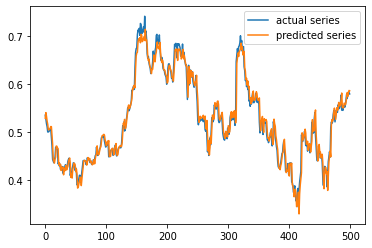

Waktu yang diperlukan dari mulai training (10000 epochs):  0:00:02.463532


In [3]:
A  = pd.read_csv("GM.csv") 
A6 = A['Close'].values   #Ambil kolom ke enam berisi 'Close', 
B  = A6[:,newaxis]  
                                     
Bmin = min(B)
Bmax = max(B)
b = (B-Bmin)/(Bmax-Bmin)

ts = 1   #Di literatur Time Series digunakan istilah 'lag' sebagai padanan istilah 'timestep' ini
xt = steps(b, ts)  #Dihasilkan matriks dengan 2 (= ts+1) kolom, kolom pertama menjadi variabel X
                   #dan kolom terkhir menjadi variabel y

x = xt[-1000:,:]    #Ambil 800 observasi terakhir

#Data untuk training
X = x[0:500, :-1]   #Ambil 680 observasi yang pertama dan hilangkan kolom terakhir
y = x[0:500:, -1:]  #Ambil 680 observasi yang pertama dan ambil kolom terakhir sebagai variabel y 

#Data untuk testing
Xtest = x[500:, :-1]   #ambil jumlah observasi sebanyak 120, hilangkan kolom terakhir (untuk y)
ytest = x[500:, -1:]   #ambil kolom terakhir

hlayers = [2,2]  #Dua hidden layers, masing-masing dengan 3 neurons dan 2 neurons
alpha   = 0.05
epochs  = 10000

tic = datetime.now()

ann2 = NeuralNetwork(X,y,hlayers,alpha)   #pembuatan object ann2

for t in range(epochs): 
    ann2.training()
    
    if (t+1)%(epochs/5) == 0:   #tampilkan output lima kali
        print("Sampai epoch ke", t+1,"dicapai akurasi MSE sebesar %8.7f" %ann2.Cost,"dengan waktu", datetime.now()-tic)

toc = datetime.now()
print('\nAkurasi dengan data training: %8.7f' %ann2.Cost,'\n')

plt.plot(y, label = 'actual series')
plt.plot(ann2.predicted_y, label = 'predicted series')
plt.legend()
plt.show()

toc = datetime.now()
print(f'Waktu yang diperlukan dari mulai training ({epochs} epochs): ', toc-tic)


#### Penyimpanan Model Deep Learning
>disimpan pada GMModel.dat

In [4]:
"Proses penyimpanan model:"

#Parameters w dan b dijadikan satu list dalam params
params = [ann2.w, ann2.b]

#Simpan params di dalam IntelModel.dat di komputer
pickle.dump(params, open("GMModel.dat", "wb"))  #Penyimpanan model parameters, wb: write binary data

#Diasumsikan sudah ada tambahan data baru Xtest maka langkah prediksi harga saham mirip seperti 
#yang dilakukan di atas. Tambahan data baru bisa pula berasal dari hasil prediksi sebelumnya 
#bila mau dilakukan prediksi yang iteratif.

#Caranya, panggil lagi paramaters dari model Deep Learning:

#### Pemanggilan dan penggunaan Model Deep Learning oleh pihak lain
>Model Deep Learning akan dipanggil dan digunakan untuk forecasting

MSE training: 0.0002831 
MSE testing : 0.0015197


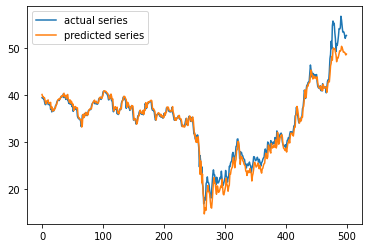

In [5]:
"Proses pemanggilan model"
pars = pickle.load(open("GMModel.dat", "rb"))  #rb: read binary data
w = pars[0]
b = pars[1]
nlayers = len(w)

"Forward propagation (perambatan maju)"
Z = []
A = [Xtest]
nlayers = len(ann2.w)

"Hidden layers"
for j in arange(len(hlayers)):
    Z.append(linear(A[j],ann2.w[j],ann2.b[j]))  #Reaksi kimia di layer ke (j + 1)
    A.append(tanh(Z[j]))     #Aliran listrik di layer ke (j + 1)

"Output layer"    
Z.append(linear(A[nlayers-1],ann2.w[nlayers-1],ann2.b[nlayers-1]))  #Reaksi kimia di layer ke (j + 1)
A.append(tanh(Z[nlayers-1]))

ytesthat = A[nlayers]   #Ini prediksi harga saham atau yhat (output di layer ke 3)
msetest  = (ytest-ytesthat).T@(ytest-ytesthat)/len(ytest)   #MSE semasa testing
print('MSE training: %8.7f'%ann2.Cost,'\nMSE testing : %7.7f'%msetest)

"Kembalikan datanya ke original unit dalam satuan dolar"
ytesto = ytest*(Bmax-Bmin)+Bmin       
ytesthato = ytesthat*(Bmax-Bmin)+Bmin 

plt.plot(ytesto, label = 'actual series')
plt.plot(ytesthato, label = 'predicted series')
plt.legend()
plt.show()